# Libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I. Measurement distances
odległości pomiarów

### Euclidean Distance

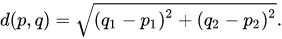

In [ ]:
def euclidean_distance(pt1,pt2):
  distance = 0
  for i in range(len(pt2)):
    distance += (pt1[i]-pt2[i])**2
  distance = distance**(1/2)
  return distance

print(euclidean_distance([1,2],[4,0]))
print(euclidean_distance([5,4,3],[1,7,9]))
print(euclidean_distance([2,3,4],[1,2]))

3.605551275463989
7.810249675906654
1.4142135623730951


### Manhattan Distance

d=∣a1−b1∣+∣a2−b2∣ <br>
extremely similar to Euclidean distance. Rather than summing the squared difference between each dimension, we instead sum the absolute value of the difference between each dimension.

> will always be greater than or equal to Euclidean distance
> obliczamy absolutną różnicę między odległością1 a odległ2


In [ ]:
def manhattan_distance(pt1,pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (abs(pt1[i] - pt2[i]))
  return distance

print(manhattan_distance([1, 2], [4, 0]))
print(manhattan_distance([5, 4, 3], [1, 7, 9]))

5
13


### Hamming Distance

Hamming distance is used in spell checking algorithms. For example, the Hamming distance between the word “there” and the typo “thete” is one. Each letter is a dimension, and each dimension has the same value except for one.


> When finding the Hamming distance between two points, add one for every dimension that has different values.
> czyli jeśli odległość1 i odległość2 się rożnią od siebie distance += 1

In [ ]:
def hamming_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    if pt1[i] != pt2[i]:
      distance += 1
  return distance

print(hamming_distance([1, 2], [1, 100]))
print(hamming_distance([5, 4, 9], [1, 7, 9]))

1
2


### SciPy Distances


Euclidean Distance .euclidean()

Manhattan Distance .cityblock()

Hamming Distance .hamming()

> Second, the scipy implementation of Hamming distance will always return a number between 0 an 1. Rather than summing the number of differences in dimensions, this implementation sums those differences and then divides by the total number of dimensions. For example, in your implementation, the Hamming distance between [1, 2, 3] and [7, 2, -10] would be 2. In scipy‘s version, it would be 2/3.

In [ ]:
from scipy.spatial import distance
print(distance.euclidean([1, 2],[4, 0]))
print(distance.cityblock([1, 2],[4, 0]))
print(distance.hamming([5, 4, 9],[1, 7, 9]))

3.605551275463989
5
0.6666666666666666


# II. Supervised Learning algorithms

### ** Zestaw treningowy vs zestaw walidacyjny vs zestaw testowy


jak ważne jest dzielenie zbioru danych na zbiory uczące, walidacyjne i testowe?

> Training Set vs Validation Set

> The training set is the data that the algorithm will learn from. <br><br>Learning looks different depending on which algorithm you are using. For example, when using Linear Regression, the points in the training set are used to draw the line of best fit. In K-Nearest Neighbors, the points in the training set are the points that could be the neighbors.<br><br>
Po uczeniu przy użyciu zbioru uczącego, punkty w zbiorze **walidacyjnym** są wykorzystywane do obliczenia dokładności lub błędu klasyfikatora. (accuracy or error of the classifier)<br><br>
Kluczowym spostrzeżeniem jest to, że znamy prawdziwe etykiety każdego punktu w zestawie walidacyjnym, ale tymczasowo zamierzamy udawać, że tak nie jest. Możemy użyć każdego punktu w zestawie walidacji jako danych wejściowych do naszego klasyfikatora.<br><br>
Możemy teraz zerknąć na prawdziwą etykietę punktu walidacji i sprawdzić, czy zrobiliśmy to dobrze, czy nie. Jeśli zrobimy to dla każdego punktu w zestawie walidacji, możemy obliczyć błąd walidacji!<br><br>
Błąd walidacji może nie być jedynym wskaźnikiem, który nas interesuje. Lepszym sposobem oceny skuteczności algorytmu uczenia maszynowego jest obliczenie jego precyzji, przywołania i wyniku F1.

 If your training set is too small, then your algorithm might not have enough data to effectively learn. On the other hand, if your validation set is too small, then your accuracy, precision, recall, and F1 score could have a large variance (rozbieżnośc). You might happen to get a really lucky or a really unlucky split! In general, putting 80% of your data in the training set, and 20% of your data in the validation set is a good place to start.

Zrozumienie dokładności Twojego modelu jest nieocenione, ponieważ możesz zacząć dostrajać parametry swojego modelu, aby zwiększyć jego wydajność.

Na przykład w algorytmie K-Nearest Neighbors możesz obserwować, co dzieje się z dokładnością, gdy zwiększasz lub zmniejszasz K. (Możesz wypróbować to wszystko w naszej lekcji K-Nearest Neighbors!)

> Once you’re happy with your model’s performance, it is time to introduce the test set.

> It functions very similarly to the validation set, except you never touched this data while building or tuning your model.

>By finding the accuracy, precision, recall, and F1 score on the test set, you get a good understanding of how well your algorithm will do in the real world.





In [ ]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


Create a variable called X that is the column of years in this prod_per_year DataFrame.



In [ ]:
X = prod_per_year["year"]
print(X)
X = X.values.reshape(-1, 1)
print(X)

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64
[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


Create a variable called y that is the totalprod column in the prod_per_year dataset.




In [ ]:
y = prod_per_year["totalprod"].astype(float)
print(y)

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


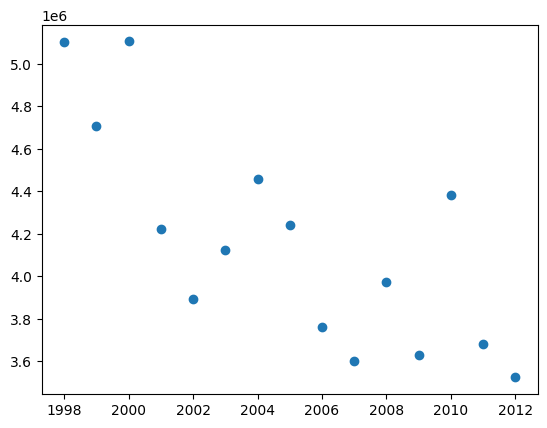

In [ ]:
plt.scatter(X,y)
plt.show()

After you have fit the model, print out the slope of the line (stored in a list called regr.coef_) and the intercept of the line (regr.intercept_).

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_[0]) #one and only el of the list so [0] #m
print(regr.intercept_) #b

y_predict = regr.predict(X)
print(y_predict)

-88303.18915238192
181208083.10732976
[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


Plot y_predict vs X as a line, on top of your scatterplot using plt.plot().

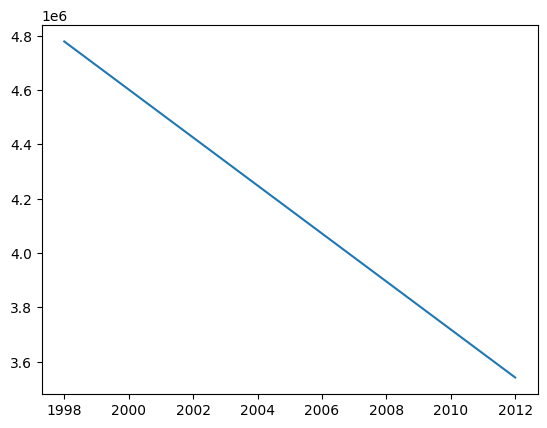

In [ ]:
plt.plot(X, y_predict)
plt.show()

So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050.




In [ ]:
start_year = 2013
end_year = 2050
X_future = np.array(range(start_year, end_year))

After creating that array, we need to reshape it for scikit-learn. You can think of reshape() as rotating this array. Rather than one big row of numbers, X_future is now a big column of numbers — there’s one number in each row.





In [ ]:
X_future = X_future.reshape(-1, 1)

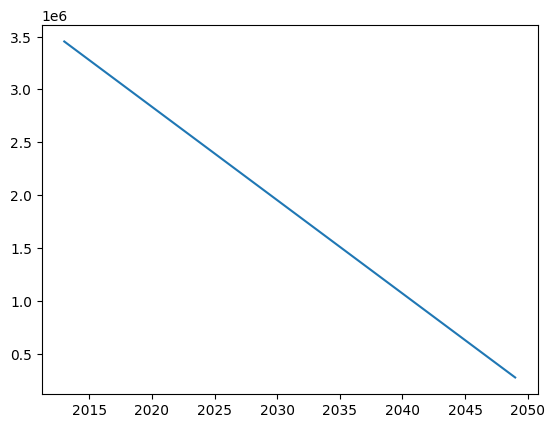

In [ ]:
future_predict = regr.predict(X_future)
plt.plot(X_future, future_predict)
plt.show()

Uczenie nadzorowane to miejsce, w którym dane są etykietowane, a program uczy się przewidywać dane wyjściowe na podstawie danych wejściowych. Na przykład algorytm uczenia nadzorowanego do wykrywania oszustw związanych z kartami kredytowymi przyjmowałby jako dane wejściowe zestaw zarejestrowanych transakcji. Dla każdej transakcji program przewidywałby, czy jest ona oszukańcza, czy nie.


## I. Linear Regression

### I. LR from scratch

Regresja służy do przewidywania niekonczących się wyników, które są ciągłe. Dane wyjściowe to ilości, które można elastycznie określić na podstawie danych wejściowych modelu, a nie ograniczać się do zestawu możliwych etykiet.
> For example:
* Predict the height of a potted plant from the amount of rainfall
* Predict salary based on someone’s age and availability of high-speed internet
* Predict a car’s MPG (miles per gallon) based on size and model year

Często jest niedoceniany ze względu na swoją względną prostotę. W środowisku biznesowym może być używany do przewidywania prawdopodobieństwa odejścia klienta lub przychodów, które klient wygeneruje.



The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression.


```
y=mx+b
```

*   m to nachylenie = slope
*   b to punkt przecięcia = intercept

Nachylenie jest miarą tego, jak stroma jest linia, podczas gdy punkt przecięcia jest miarą miejsca, w którym linia styka się z osią y.

Kiedy wykonujemy regresję liniową, celem jest uzyskanie „najlepszego” mib dla naszych danych





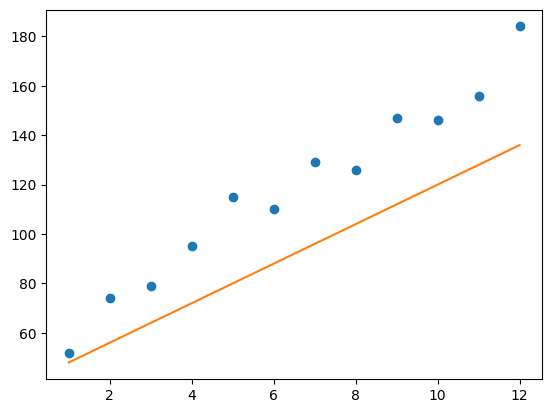

In [ ]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

m = 8
b = 40
plt.plot(months, revenue, "o")

y = [el*m+b for el in months]

plt.plot(months,y)
plt.show()

Aby linia była bardziej stroma, zwiększ wartość m. Aby przesunąć linię w górę, zwiększ wartość b.


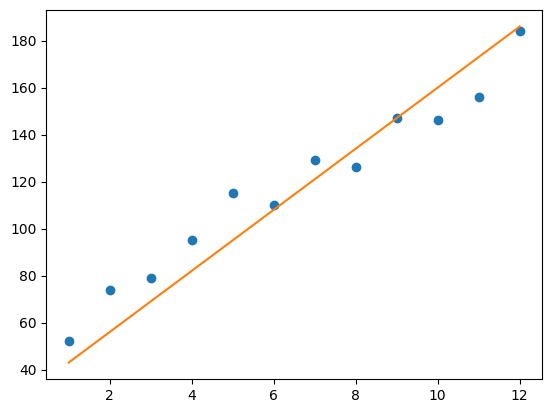

In [ ]:
m = 13
b = 30
plt.plot(months, revenue, "o")

y = [el*m+b for el in months]

plt.plot(months,y)
plt.show()

#### Loss

number that measures how bad the model’s (in this case, the line’s) prediction was

Możemy myśleć o utracie jako o kwadratu odległości od punktu do prostej. Wykonujemy odległość do kwadratu (zamiast samej odległości), tak aby punkty powyżej i poniżej linii przyczyniały się do całkowitej straty w ten sam sposób


*   For point A, the squared distance is 9 (3²)

*   For point B, the squared distance is 1 (1²)

> So the total loss, with this model, is 10. If we found a line that had less loss than 10, that line would be a better model for this data.





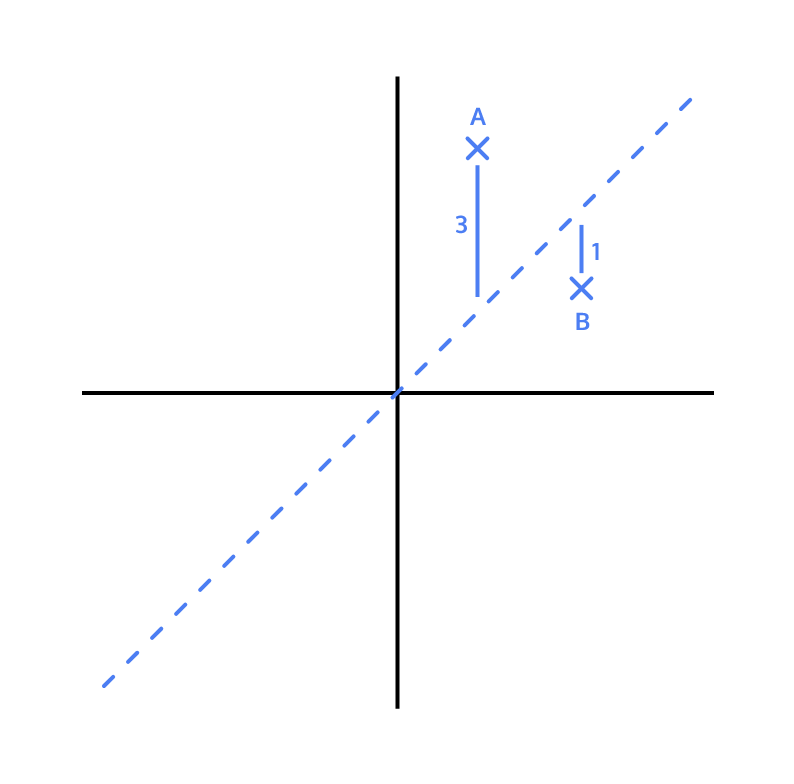

In [ ]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1

y_predicted1 = [m1*el+b1 for el in x]
y_predicted2 = [m2*el+b2 for el in x]

total_loss1 = 0
for i in range(len(y)):
  difference = (y[i]-y_predicted1[i])**2
  total_loss1 += difference

total_loss2 = 0
for i in range(len(y)):
  difference = (y[i]-y_predicted2[i])**2
  total_loss2 += difference

print(total_loss1, total_loss2)

better_fit = 2

#### Minimizing Loss


https://content.codecademy.com/programs/data-science-path/line-fitter/line-fitter.html

#### Gradient Descent for Intercept - czyli dla b


Gdy staramy się zminimalizować straty, bierzemy każdy parametr, który zmieniamy, i przesuwamy go tak długo, jak zmniejszamy stratę. To tak, jakbyśmy schodzili w dół wzgórza i zatrzymywali się, gdy dotrzemy do dna:


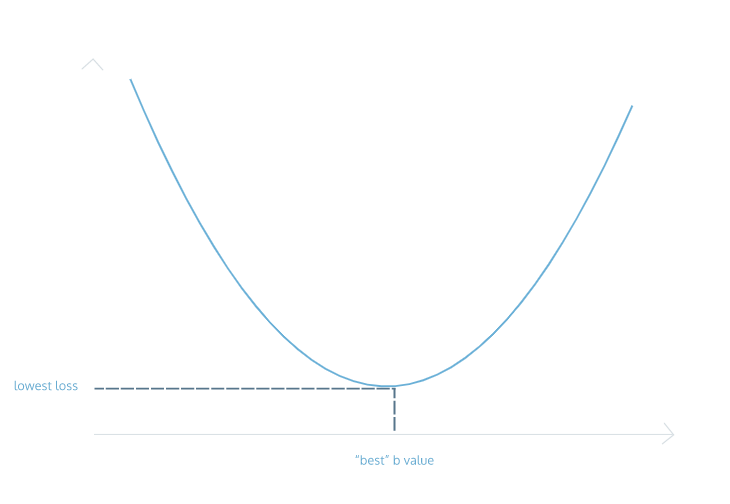

Proces, w którym to robimy, nazywa się zejściem gradientowym. Idziemy w kierunku, który najbardziej zmniejsza naszą stratę. Gradient odnosi się do nachylenia krzywej w dowolnym punkcie.

Załóżmy na przykład, że próbujemy znaleźć punkt przecięcia linii. Obecnie szacujemy, że przechwycenie to 10. W punkcie 10 na łuku nachylenie jest w dół.

Dlatego jeśli zwiększymy wyraz wolny, powinniśmy zmniejszyć stratę. Więc podążamy gradientem w dół.


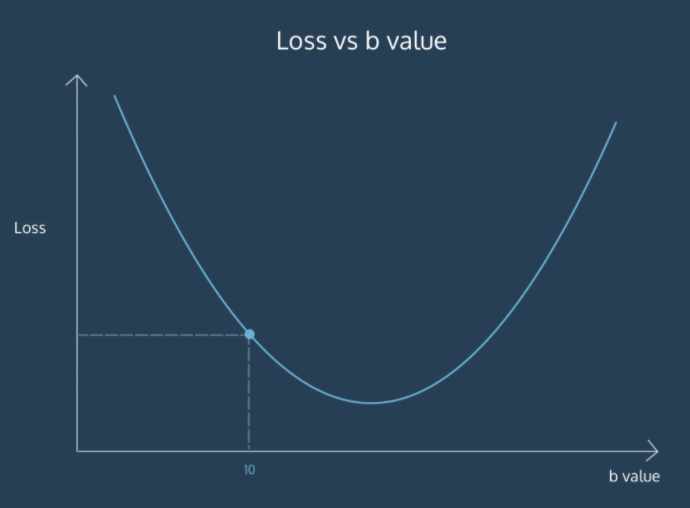

Gradienty te wyprowadzamy za pomocą rachunku różniczkowego. Nie jest istotne, aby zrozumieć, w jaki sposób dochodzimy do równania gradientu. Aby znaleźć gradient straty w miarę zmian przecięcia, formuła wygląda następująco:


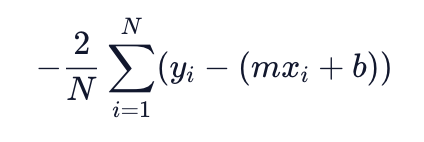


*   N is the number of points we have in our dataset
*   m is the current gradient guess
*  b is the current intercept guess




In [ ]:
def get_gradient_at_b(x,y,m,b):
  diff=0
  N = len(x)
  for i in range(len(x)):
    diff += (y[i]-(m*x[i]+b))
  b_gradient = (-2/N)*diff
  return b_gradient

#### Gradient Descent for Slope / Opadanie gradientu dla nachylenia czyli m(albo a)





!! Mamy funkcję do znalezienia gradientu b w każdym punkcie


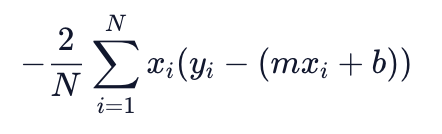

In [ ]:
def get_gradient_at_m(x,y,m,b):
    diff = 0
    N = len(x)
    for i in range(N):
      y_val = y[i]
      x_val = x[i]
      diff += x_val*(y_val - ((m * x_val) + b))
    m_gradient = -2/N * diff
    return m_gradient

Teraz, gdy wiemy, jak obliczyć gradient, chcemy zrobić „krok” w tym kierunku. Jednak ważne jest, aby zastanowić się, czy ten krok jest za duży, czy za mały. Nie chcemy przekroczyć minimalnego błędu!

Możemy skalować rozmiar kroku, mnożąc gradient przez szybkość uczenia się.



```
new_b = current_b - (learning_rate * b_gradient)

```



In [ ]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff
  return m_gradient

# Define your step_gradient function here
def step_gradient(x,y, b_current, m_current):
  m_gradient = get_gradient_at_m(x,y,b_current,m_current)
  b_gradient = get_gradient_at_b(x,y,b_current,m_current)
  m = b_current - (0.01 * b_gradient)
  b = m_current - (0.01 * m_gradient)
  return [m, b]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
b,m = step_gradient(months,revenue, b, m)
print(b, m)

2.355 17.78333333333333


#### Convergence


Skąd wiemy, kiedy powinniśmy przestać zmieniać parametry m i b? Skąd będziemy wiedzieć, kiedy nasz program nauczył się wystarczająco dużo?

Aby na to odpowiedzieć, musimy zdefiniować zbieżność. Konwergencja ma miejsce, gdy strata przestaje się zmieniać (lub zmienia się bardzo powoli) po zmianie parametrów.


####Learning Rate

Chcemy, aby nasz program mógł iteracyjnie uczyć się, jakie są najlepsze wartości mib. Więc dla każdej pary m i b, którą zgadujemy, chcemy przesunąć je w kierunku gradientów, które obliczyliśmy. Ale jak daleko idziemy w tym kierunku?

Musimy wybrać tempo uczenia się, które określi, jak daleko w dół krzywej strat pójdziemy.

Niewielki wskaźnik uczenia się zajmie dużo czasu, aby uzyskać zbieżność — może zabraknąć czasu lub cykli, zanim uzyskasz odpowiedź. Duża szybkość uczenia się może pominąć najlepszą wartość. To może nigdy się nie zbiegać! O nie!

Znalezienie absolutnie najlepszej szybkości uczenia się nie jest konieczne do uczenia modelu. Musisz tylko znaleźć tempo uczenia się na tyle duże, aby opadanie gradientu zbiegało się z potrzebną wydajnością, a nie tak duże, aby zbieżność nigdy nie zachodziła.


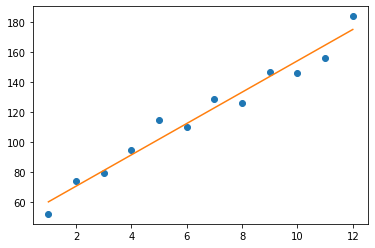

In [ ]:
#Your step_gradient function here
def step_gradient(b_current, m_current, x, y,learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

#Your gradient_descent function here:
def gradient_descent(x, y, learning_rate,num_iterations):
  m = 0
  b = 0
  for i in range(num_iterations):
    b,m = step_gradient(b,m,x,y,learning_rate)
  return [b,m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heights.csv")
X = df["height"]
y = df["weight"]

plt.plot(X, y, y_predictions,  'o')

plt.show()

b,m = gradient_descent(X
,y,num_iterations=1000, learning_rate=0.0001)

y_predictions = [el*m+b for el in X]
# plt.plot(X, y_predictions, 'o')


### II. LR with Scikit-Learn


Uwaga: num_iterations i learning_rate, o których dowiedziałeś się we własnej implementacji, mają wartości domyślne w ramach scikit-learn, więc nie musisz się martwić o ich konkretne ustawienie!

Create a list called sales_predict that is the predicted sales values that line_fitter would generate from the temperature list.
(Utwórz listę o nazwie sales_predict, która zawiera przewidywane wartości sprzedaży, które monter_linii wygeneruje z listy temperatur.
)

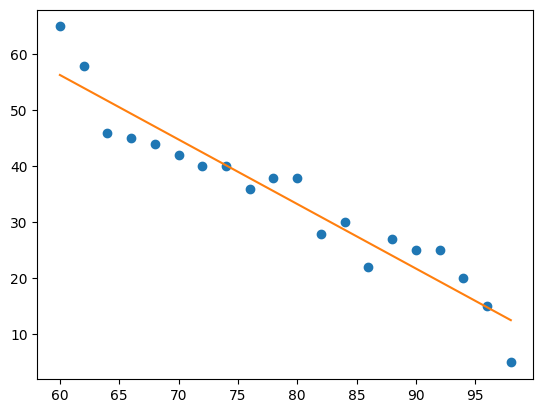

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')

line_fitter = LinearRegression()
line_fitter.fit(temperature,sales)
sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict)
plt.show()

## Pytania

When does the linear regression algorithm stop?

> Kiedy parametry przestają się zmieniać (albo ta zmiana zachodzi powoooli).

The goal of a linear regression algorithm is to find the _____ and _____ that minimize average loss.

> slope & intercept

Let’s say we have 3 lines that produce the following average loss on our dataset. Which one is the line of best fit?
```
Line A: 17
Line B: 11.5
Line C: 13
```
> B - This is the line with the lowest average loss, which is what we want.

If the model worked correctly, what should y_new represent in the code below?
```
regr = LinearRegression()
regr.fit(X, y)
y_new = regr.predict(X)
```
> y-values that X would produce on the line of best fit (y_new should be predicted y-values from the same x-values we used to train the model)

What is the purpose of performing gradient descent?
> to move parameters in the direction that minimizes loss (Parameters might increase or decrease, but overall loss should go down.)

If the algorithm is taking too long to converge, should you move the learning rate up or down?

> Up (Gradient descent is already being performed in steps that are too small, and lowering the learning rate would only make the steps smaller. Gradient descent is being performed in small steps, which is making it take a long time to get to the bottom of the curve.)






### Projekt Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "./drive/MyDrive/codecademy/honeyproduction.csv"

./drive/MyDrive/codecademy/honeyproduction.csv


honey production in the United States from Kaggle. It is called df and has the following columns:

In [ ]:
df = pd.read_csv("./drive/MyDrive/codecademy/honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


For now, we care about the total production of honey per year. Use the .groupby() method provided by pandas to get the mean of totalprod per year.



## II. Multiple Linear Regression

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable.

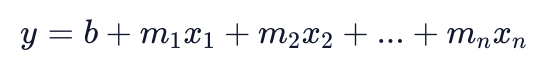

Training set: the data used to fit the model <br>
Test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)

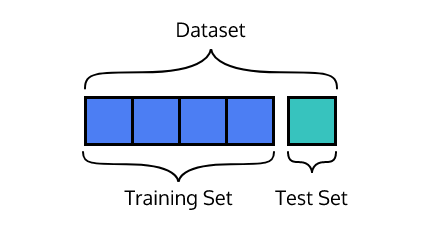

Moja notka: <br>
W prostych słowach nasze dane składają się z training set i test set, tylko część danych poświęcamy na wytrenowanie modelu, więc uczymy model na danych treningowych, a część z nich bierzemy żeby sprawdzić jakie wyniki otrzymamy posiadając dany model.
Zwykle podział 80% training, 20% test.

In [ ]:
#ogarniamy dane:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split


streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2831, 14)
(2831, 1)
(708, 14)
(708, 1)


Mamy 14 cech, których szukamy dla każdego mieszkania i 1 label, którego szukamy dla każdego mieszkania


In [ ]:
# we need to import LinearRegression from the linear_model module:
from sklearn.linear_model import LinearRegression

#Then, create a LinearRegression model, and then fit it to your x_train and y_train data:
mlr = LinearRegression()

mlr.fit(x_train, y_train)

#We can also use the .predict() function to pass in x-values. It returns the y-values that this plane would predict:
y_predicted = mlr.predict(x_test)
# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values.

#To see this model in action, let’s test it on Sonny’s apartment in Greenpoint, Brooklyn!
# Or if you reside in New York, plug in your own apartment’s values and see if you are over or underpaying!
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
predict = mlr.predict(sonny_apartment)
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model=lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)


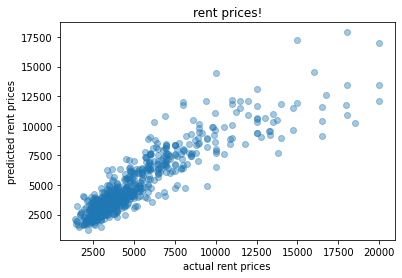

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("actual rent prices")
plt.ylabel("predicted rent prices")
plt.title("rent prices!")
plt.show()

 The equation for multiple linear regression that uses two independent variables is this:​<br>
 y = b + m1x1 + m2x2 <br><br>
 Equation 6.2 The equation for multiple linear regression that uses three independent variables is this:<br>
 y = b + m1x1 + m2x2 + m3x3<br><br>  multiple linear regression can use any number of independent variables, its general equation becomes: <br>
 y = b + m1x1 + m2x2 + m3x3 + ... + mnxn<br><br>

🟡 Here, m1, m2, m3, … mn refer to the coefficients, and<br>
b refers to the intercept that you want to find.
<br><br>
COEF (The coefficients are helpful in determining which independent variable carries more weight!)
COEF -1.5 or 1.5 = both have the same impact! (-1.5==1.5)

In [ ]:
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.



Graphically, when you see a downward trend, it means a negative linear relationship exists. When you find an upward trend, it indicates a positive linear relationship.

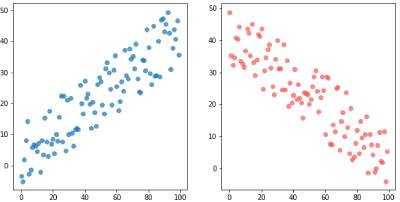

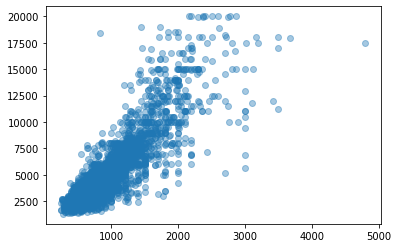

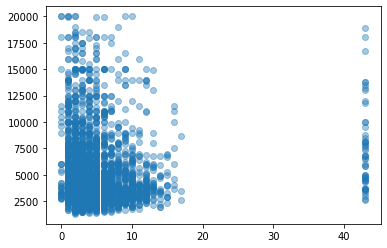

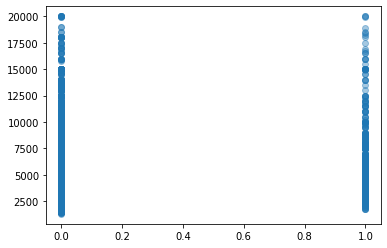

In [ ]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.show()
plt.scatter(df[['has_gym']], df[['rent']], alpha=0.4)
plt.show()

### Evaluating the Model's Accuracy


to evaluate the accuracy of our multiple linear regression model, one technique we can use is Residual Analysis.

The difference between the actual value y, and the predicted value ŷ is the residual e. The equation is: <br>
​


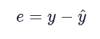

In the StreetEasy dataset, y is the actual rent and the ŷ is the predicted rent. The real y values should be pretty close to these predicted y values.

sklearn‘s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction. Residual Analysis is used to evaluate the regression model’s accuracy. In other words, it’s used to see if the model has learned the coefficients correctly

The coefficient R² is defined as:

(R² is the percentage variation in y explained by all the x variables together.)

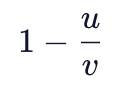

where u is the residual (=reszta) sum of squares:
```
((y - y_predict) ** 2).sum()
```
and v is the total sum of squares (TSS):
```
((y - y.mean()) ** 2).sum()
```
The TSS tells you how much variation there is in the y variable.
<br><br><br>
ODCZYTYWANIE WYNIKÓW:
The best score is 1.0.
<br><br>
For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).
<br><br>
Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.
<br><br>
The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.


In [ ]:
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.7725460559817883
0.8050371975357646


### Rebuild the Model - IMPROVE IT !



Remove some of the features that don’t have strong correlations and see if your scores improved!



Train score:
0.7715453027105111
Test score:
0.8051622423416779


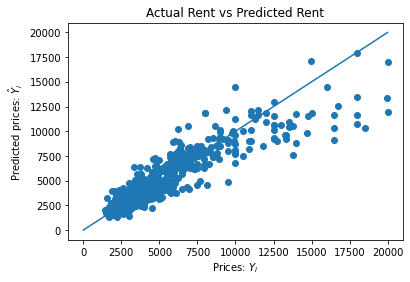

[[-300.06736921 1188.43431926    4.82966205  -24.99358384   23.83725633
    -7.28127627]]


In [ ]:
df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()
print(lm.coef_)

Multiple linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it’s learned correctly, we can then use it to make predictions by plugging in new x values

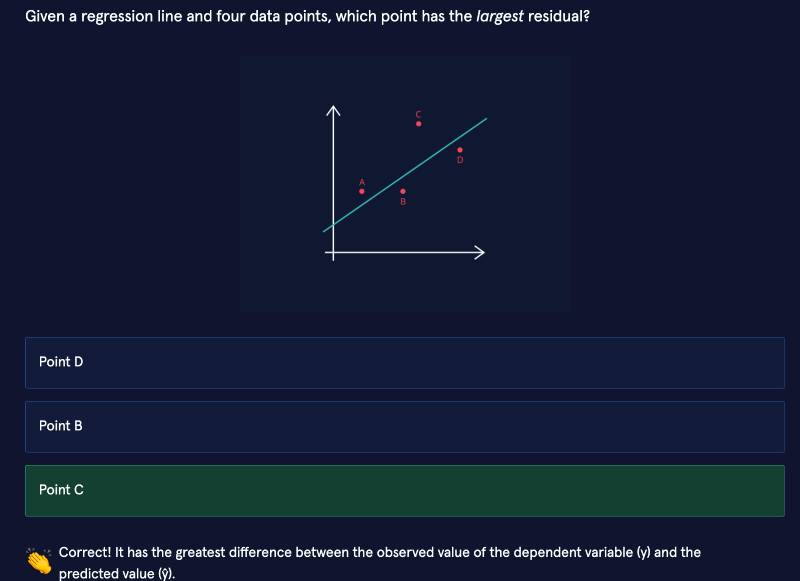

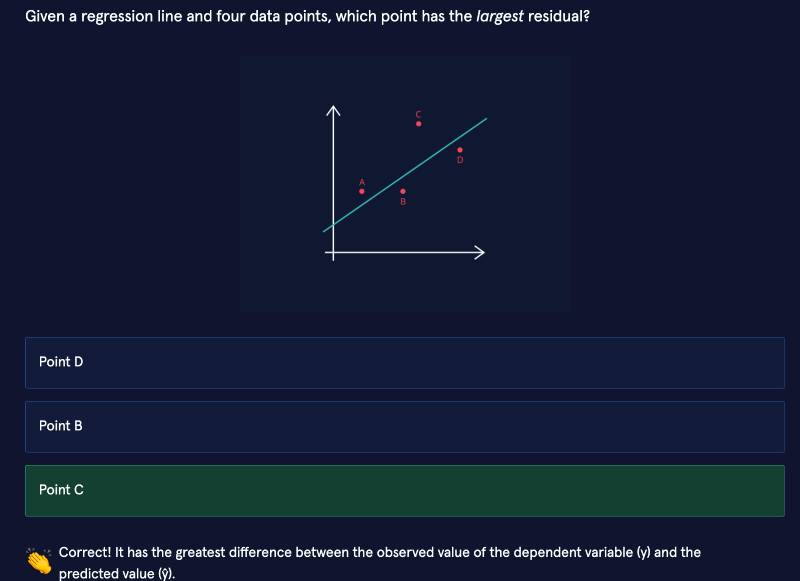

*The test set is the data that you partition away at the very start of your experiment (to provide an unbiased evaluation of the model).

## III. Logistic Regression
Różnice:
- krzywa a nie linia
- Regresja liniowa daje niekończące się wyniki, ale regresja logistyczna daje wyniki ciągłe.
- Regresja prostoliniowa jest szacowana przy użyciu zwykłej metody najmniejszych kwadratów (OLS), natomiast regresja logistyczna jest szacowana przy użyciu metody maksymalnego oszacowania prawdopodobieństwa (MLE)
- regresja logistyczna jest rozszerzeniem liniowej, gdzie używam logit link by dopasować krzywą sigmoidalną do danych (a nie linię)
- oblicza prawdop sukcesu

<br><br>
Cechy:
- powszechna
-  rozkładem dwumianowy, lit S
- rozwiązuje problemy klasyfikacji binarnej (dwuklasowej - charakter dychotomiczny. Dychotomiczna oznacza, że istnieją tylko dwie możliwe klasy)
- przewiduje prawdopodobieństwo 0-1 przynależności datapoint do jakiejś kategorii / klasy
- opisuje i szacuje związek pomiędzy jedną zależną zmienną binarną a niezależnymi zmiennymi.
- predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class
- Disease identification — Is a tumor malignant?
- Konwersja klienta — czy klient przybywający na stronę rejestracji zarejestruje się w usłudze?
-Przewidywanie cukrzycy, jeśli dany klient zakupi określony produkt lub wyrzuci innego konkurenta
- czy użytkownik kliknie na dany link reklamowy czy nie

- w regresji lin: x_1, x_2, x_n - predictors, features
- y=1/0 with (only one predictor) x_1 which is = hours studied
<br><br>
WAŻNE
❗ ❗  sklearns's logistic regression implementation requires the features to be standardized because regularization is implemented by default 🟡 🟡

### Binarna Regresja Logistyczna
Zmienna docelowa ma tylko dwa możliwe wyniki jak Spam lub Nie Spam, Rak lub Brak Raka.



model to predict whether or not a student will pass the final exam
- probability of passing based on the number of hours a student reports studying
- 0 fail, 1 pass


In [ ]:
plt.scatter( x= 'hours_studied',y ='passed_exam', data = df, color='black')
plt.xlabel('hours studied')
plt.ylabel('passed/failed')

best fit line allows predictions between negative and positive infinity.

In [ ]:
from sklearn.linear_model import LinearRegression()
model = LinearRegression()
model.fit(df[['hours_studied']],df[['passed_exam']])

# Get predictions from the linear model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
predictions = model.predict(sample_x)

plt.scatter( x= 'hours_studied',y ='passed_exam', data = df, color='black', s=100)
#plot line
plt.scatter(sample_x, predictions, color='red',linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('outcome (1=passed, 0=failed)', fontsize = 15)
plt.xlabel('hours studied', fontsize = 15)
plt.xlim(-16.65, 33.35)
plt.ylim(-.3, 1.8)

# Show the plot
plt.tight_layout()
plt.show()

#### Logarytm szans (log odds)


check if a visitor will make a purchase based on mins spent on a www<br><br>

- we replace y with the letter p for a probability<br><br>
ps. prognozy wahają się od ujemnej do dodatniej nieskończoności: są to logarytmy szans (log-odds)<br>
- p = 0.7 dla studenta, że zda, zatem, p na niezdanie wynosi: 1 - 0.7 = 0.3. zatem szanse na zdanie:
<br>0.7/0.3=2.33

- odds = p /(1-p) = p(event occuring)/p(event not occuring)<br>
ln(p/(1-p))=-3.28984
<br>
- We can turn log odds into a probability<br>
 ln(p/(1-p))=e^(-3.28984) = (0.04)
- logit function (log odds) transforms a probability (which is a number between 0 and 1) into a continuous value that can be positive or negative



In [ ]:
# Calculate odds_on_time
import numpy as np

odds_on_time = 0.9 /(1-0.9)
print(odds_on_time)

# Calculate log_odds_on_time
log_odds_on_time = np.log(odds_on_time)
print(log_odds_on_time)

#calc that a bus will be late (its late for 35% of the time)
odds_late = 0.35 /(1-0.35)
print(odds_late)
log_odds_late = np.log(odds_late)
print(log_odds_late)

#Python number method exp() returns returns exponential of x: ex.

9.000000000000002
2.1972245773362196
0.5384615384615384
-0.6190392084062235


#### Sigmoid Function

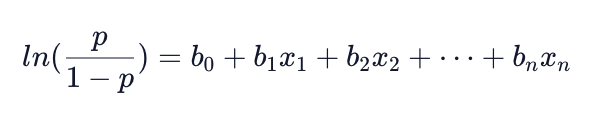

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(purchase, min_on_site)

log_odds = model.intercept_ + model.coef_ * min_on_site
print(log_odds)

#prob:
prob_purchasing = np.exp(log_odds)/(1+ np.exp(log_odds))

#### Coefficient (współczynnik) interpretacja:
- Duży współczynnik dodatni: wzrost tej cechy o jedną jednostkę wiąże się z dużym wzrostem logarytmu szans (a tym samym prawdopodobieństwa) punktu danych należącego do klasy dodatniej (grupa wyników oznaczona jako 1)
- Duży współczynnik ujemny: wzrost tej cechy o jedną jednostkę wiąże się z dużym spadkiem logarytmu szans/prawdopodobieństw przynależności do klasy dodatniej.
- Współczynnik 0: Cecha nie jest powiązana z wynikiem.

https://medium.com/@mystery0116/interpret-the-impact-size-with-logistic-regression-coefficients-5eec21baaac8


In [ ]:
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression

cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Print the intercept and coefficients here:
print(cc_lr.coef_, cc_lr.intercept_)

#### Predictions
- .predict() method - the input is a matrix of features and the output is a vector of predicted labels, 1 or 0.
- .predict_proba() method - zwraca prawdopodobieństwo przynależności do klasy dla obu możliwych grup, check prob ranging from 0-1 (# Sample output: [0.32 0.75  0.55 0.20 0.44]
) ===> sklearn sets the default classification threshold probability as 0.5, so below 0.5 we give 0 label

In [ ]:
print(cc_lr.predict(X_test))
print(cc_lr.predict(X_test))[:,1]) #prawdop przynależności tylko do klasy pozytywnej

#### Treshold - próg
default classifications treshold is 0.5 in sklearn
* po co zaniżać? np. w przypadku wykrywania raka, gdzie positive class = "ma raka", bo zwiększamy prawdop uratowania ludzi

#### Confusion matrix

idealny scenario: TN i TP - as large as possible, bo 0 to 0, 1 to 1
(y_test jest jak y_pred)

- TP - to jabłka rozpoznane jako jabłka / nie-spam wpada do skrzynki odbiorczej / nie-spam jest nie-spamem

- TN - to gruszki rozpoznane jako gruszki  / spam wpada do skrzynki spam / spam jest spamem

- FN - jabłka, które zostały błędnie rozpoznane jako gruszki. / nie-spam do spamu

- FP - gruszki, które zostały błędnie rozpoznane jako jabłka. / spam do odbiorczej

- P (TP+FN)- wszystkie jabłka – zarówno te rozpoznane prawidłowo, jak i te omyłkowo uznane za gruszki.

- N (TN+FP)- wszystkie gruszki – pomylone z jabłkami oraz prawidłowo rozpoznane przez algorytm.

y_true/y_test - oszacowana kategoria, w której powinien się znaleźć mail

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))
print(confusion_matrix(y_test, y_pred))
# output ==> array([[TN, FP], [FN, TP]]) np. array([[3, 2],[1, 4]])

#### Accuracy, Recall, Precision, F1 Score
* dobrze, jeśli są bliskie 1
$$dokładność=accuracy=ACC=\frac{TP+TN}{P+N}=\frac{TP+TN}{TP+FP+TN+FN}$$

* dokładność powie nam, ile procent z tych wierszy/maili/warzyw zostało zaklasyfikowanych poprawnie

$$recall=czułość=TPR=\frac{TP}{TP+FN}=\frac{TP}{P}$$

* Czułość mówi nam o tym, jaki jest udział prawidłowo zaprognozowanych przypadków pozytywnych (TP) wśród wszystkich przypadków pozytywnych (P)
* ❗jeśli nic nie wpadnie do FN, to TPR = 1

$$precyzja=precision=PPV=\frac{TP}{TP+FP}$$
* Dzielimy liczbę prawidłowo zaprognozowanych pozytywnych wartości (TP) przez sumę wszystkich zaprognozowanych pozytywnie (również tych błędnie oznaczonych jako pozytywne)
* ile wśród przykładów zaprognozowanych pozytywnie jest rzeczywiście pozytywnych.

$$F1 score=\frac{2TP}{2TP+FP+FN}$$
* W najlepszym przypadku przyjmuje wartość 1, kiedy mamy do czynienia z idealną czułością i precyzją.
* Używamy go wtedy, kiedy precyzja i czułość są dla nas tak samo ważne. Jeśli nie są, to warto skorzystać z ogólnego wzoru na F-beta score:

### Wielomianowa regresja logistyczna:
Zmienna docelowa ma trzy lub więcej kategorii nominalnych jak przewidywanie rodzaju Wina

### Regresja logistyczna zwykła:
Zmienna docelowa ma trzy lub więcej kategorii zwykłych, takich jak ocena restauracji lub produktu od 1 do 5 .



## IV. Klasyfikacja

An important note about binary and multi-class classification is that in both, each outcome has one specific label. However, in multi-label classification, there are multiple possible labels for each outcome. This is useful for customer segmentation, image categorization, and sentiment analysis for understanding text. To perform these classifications, we use models like Naive Bayes, K-Nearest Neighbors, SVMs, as well as various deep learning models.



### I. K-Nearest Neighbors from scratch


Distance between 2D points

In [ ]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

def distance(movie1, movie2):
  len_diff = (movie1[0] - movie2[0])**2
  year_diff = (movie1[1] - movie2[1])**2
  dist = (len_diff + year_diff)**.5
  return dist

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

10.770329614269007
38.897300677553446


Distance between 3D points

In [ ]:
star_wars = [125, 1977, 11000000]
raiders = [115, 1981, 18000000]
mean_girls = [97, 2004, 17000000]

def distance(movie1, movie2):
  diff = 0
  for id in range(len(movie1)):
    diff += (movie1[id] - movie2[id])**2
  distance = diff ** 0.5
  return distance

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

7000000.000008286
6000000.000126083


#### 1. Normalize the data

why? Jeśli jedna cecha jest w milionach, a jedna w setkach, funkcja w setkach nie będzie miała znaczenia!

with min max


In [ ]:
release_dates = [1897, 1998, 2000, 1948, 1962, 1950, 1975, 1960, 2017, 1937, 1968, 1996, 1944, 1891, 1995, 1948, 2011, 1965, 1891, 1978]


def min_max_normalize(lst):
  normalized = []
  minimum = min(lst)
  maximum = max(lst)
  for el in lst:
    normalized_el = (el - minimum) /(maximum - minimum)
    normalized.append(normalized_el)
  return normalized

print(min_max_normalize(release_dates))
print(min_max_normalize(release_dates)[0])
print(sorted(release_dates))
print(min_max_normalize(sorted(release_dates))[0])

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]
0.047619047619047616
[1891, 1891, 1897, 1937, 1944, 1948, 1948, 1950, 1960, 1962, 1965, 1968, 1975, 1978, 1995, 1996, 1998, 2000, 2011, 2017]
0.0


#### 2. Find the k nearest neighbors

In [ ]:
def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance


def classify(unknown,dataset,k):
  distances = []
  for title in dataset:
    distance_to_point = distance(dataset[title], unknown)
    distances.append([distance_to_point, title])
  distances.sort()
  neighbors = distances[:k]
  return neighbors


print(classify([.4, .2, .9]
, movie_dataset, 5))
# [[0.08273614694606074, 'Lady Vengeance'], [0.22989623153818367, 'Steamboy'],..]

#### 3. Classify the new point based on those neighbors

In [ ]:
def classify(unknown, dataset, labels, k):
  num_good = 0
  num_bad = 0
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]

  for movie in neighbors:
    title = movie[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0

print(classify([.4, .2, .9], movie_dataset, movie_labels, 5))

#classifier is now able to predict whether a movie will be good or bad.
print("Call Me By Your Name" in movie_dataset)
my_movie = [300000,120,1989]
normalized_my_movie = normalize_point(my_movie)
print(normalized_my_movie)
print(classify(normalized_my_movie, movie_dataset, movie_labels, 5))

#### Choose K

- low k - acc low due to overfitting (overfitting = gdy zakładam, że dane będą zachowywać się w świecie tak samo jak dane treningowe)
* If k = 1, a single outlier could predict a datapoint to be class A even if every other point in the same area is class B.


- huge k - underfitting, acc starts to drop, wszystkie prognozy będą dokładnie takie same

<br>
Jaki jest potencjalny problem, jeśli k jest parzyste?<br>
* taka sama liczba bliskich sąsiadów z obu klas

In [ ]:
def find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, k):
  num_correct = 0.0
  for title in validation_set:
    guess = classify(validation_set[title],training_set, training_labels, k)
    if guess == validation_labels[title]:
      num_correct += 1
  return num_correct/len(validation_set)

print(find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, 3))

### II. K-Nearest Neighbors using sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

guesses = classifier.predict(unknown_points)
print(guesses)

[1 1 1]


### III. K-Nearest Neighbors REGRESSOR

#### Regression

we are now going to predict its IMDb rating as a real number.

### IV. Decision Trees

When considering buying a car, what factors go into making that decision?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,accep
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
df.head()

,buying,maint,doors,persons,lug_boot,safety,accep
0,vhigh,vhigh,2,2,small,low,False
1,vhigh,vhigh,2,2,small,med,False
2,vhigh,vhigh,2,2,small,high,False
3,vhigh,vhigh,2,2,med,low,False
4,vhigh,vhigh,2,2,med,med,False


In [ ]:
df.iloc[:,0:6]

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


created dummy features for the categorical values

In [ ]:
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']
df.head()

,buying,maint,doors,persons,lug_boot,safety,accep
0,vhigh,vhigh,2,2,small,low,False
1,vhigh,vhigh,2,2,small,med,False
2,vhigh,vhigh,2,2,small,high,False
3,vhigh,vhigh,2,2,med,low,False
4,vhigh,vhigh,2,2,med,med,False


In [ ]:
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
print(X.columns)
print(len(X.columns))

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')
21


In [ ]:
len(X)

1728

In [ ]:
df[df['accep']==False].count()[1]

1210

In [ ]:
df[df['accep']==True].count()[1]

518

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

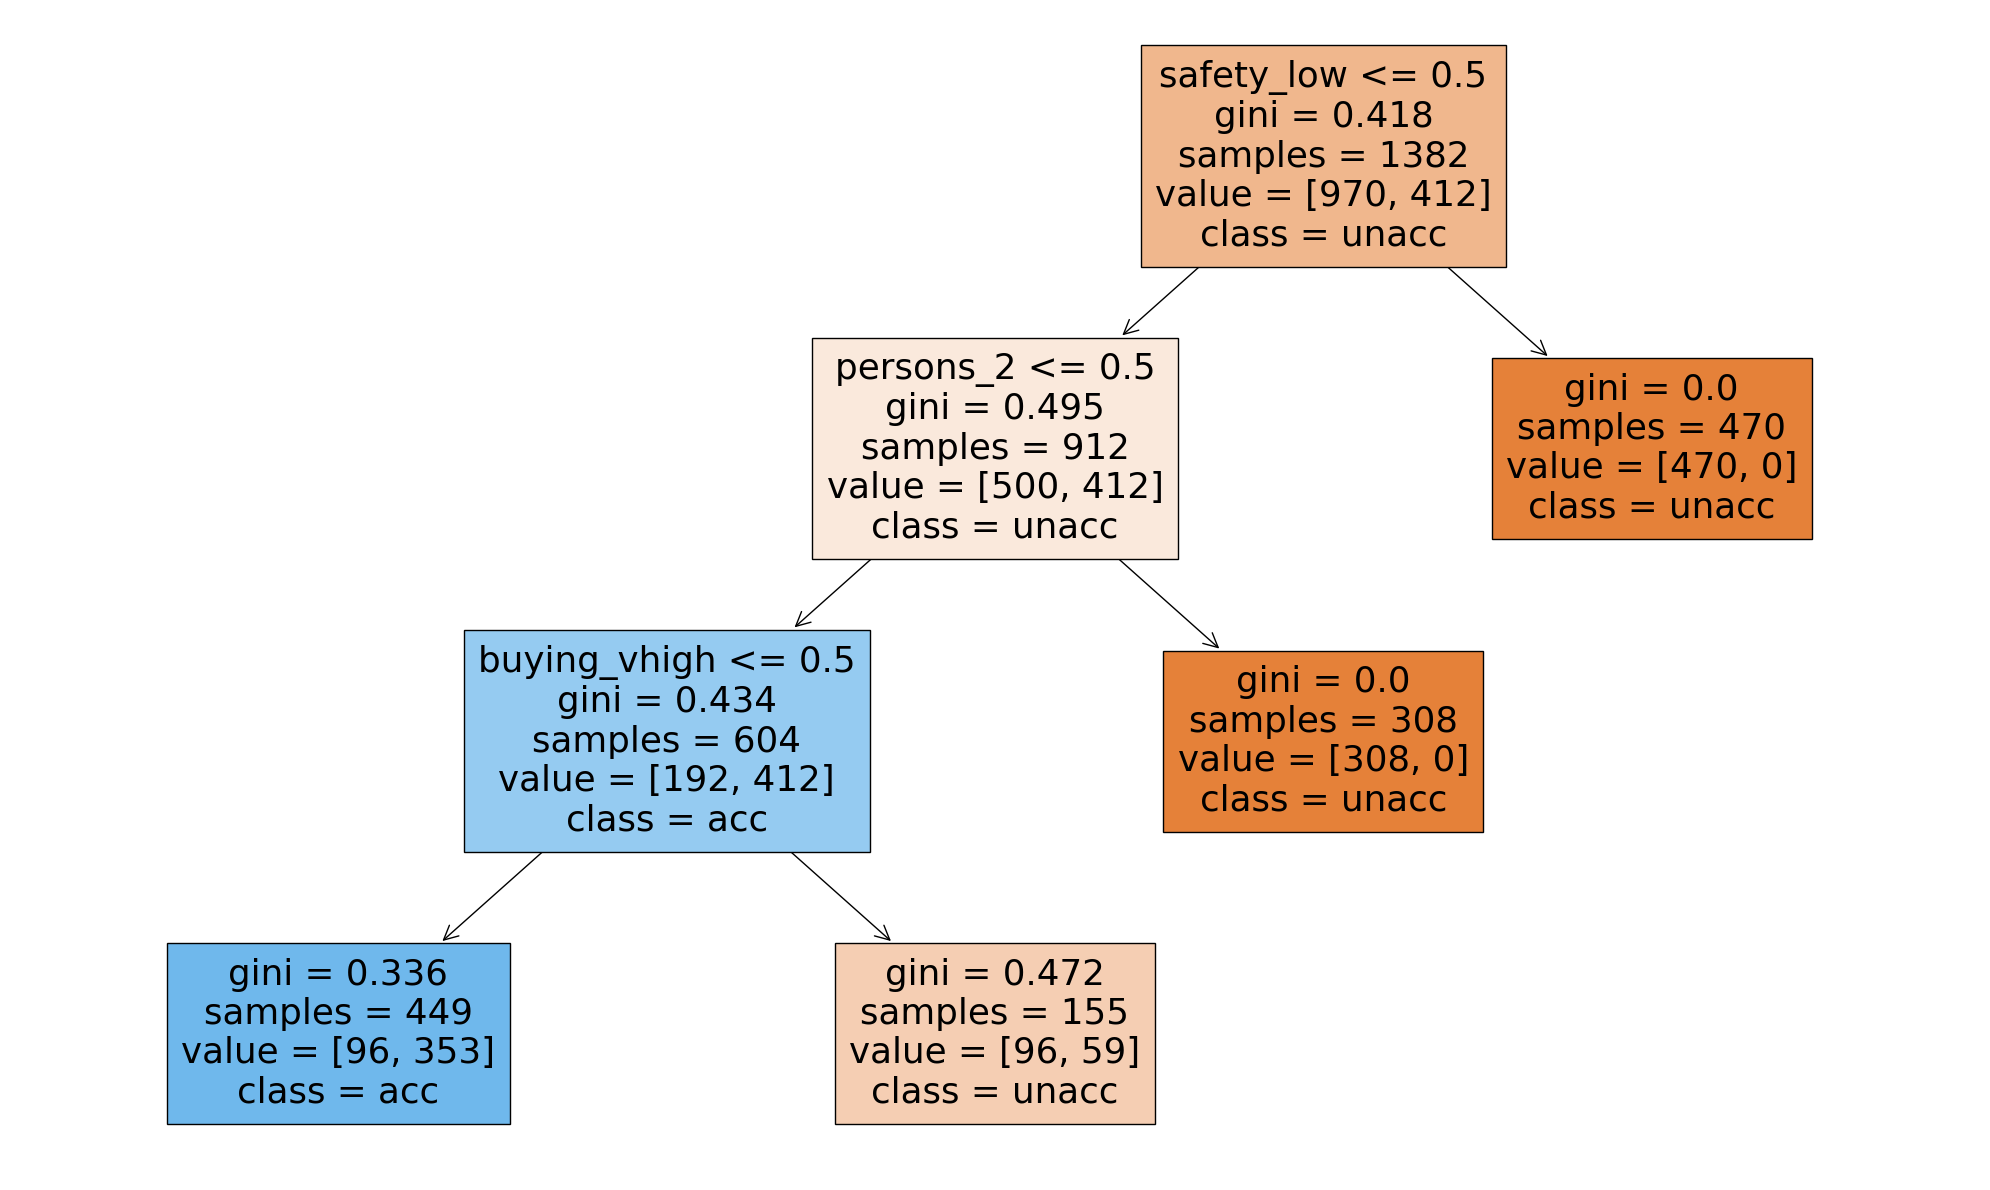

In [ ]:
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=5, class_names = ['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

Węzeł główny (root node) jest identyfikowany jako wierzchołek drzewa.

The first split occurs off the root node based on the boolean safety_low <=0.5. As this is a dummy variable, a value of 1 indicates safety='low', 0 indicates safety<>'low'. Splits occur with True to the left, False to the right.

In [ ]:
frac_acc = 412/1382
print(f'Fraction of acceptable cars: {frac_acc}')
low_safety_class = 'unacc'
print(f'Cars with low safety: {low_safety_class}')

#decision tree for the sample with buying_vhigh=1, persons_2= 0, safety_low =0
sample_class = 'unacc'
print(f'The classs of the sample car: {sample_class}')

Fraction of acceptable cars: 0.2981186685962373
Cars with low safety: unacc
The classs of the sample car: unacc


In [ ]:
print(df['buying'].unique())
print(df['maint'].unique())
print(df['doors'].unique())
print(df['persons'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']


# III. Unsupervised learning algorithms



*   brak etykiet



## I. Clustering

Znajduje wzorce i struktury w nieoznakowanych danych, grupując je w klastry.
* Social networks clustering topics in their news feed
* Consumer sites clustering users for recommendations
* Search engines to group similar objects in one cluster

A social media platform wants to separate their users into categories based on what kind of content they engage with. They have collected three pieces of data from a sample of users:
* Number of hours per week spent reading posts
* Number of hours per week spent watching videos
* Number of hours per week spent in virtual reality

The company is using an algorithm called k-means clustering to sort users into three different groups.

# IV. Numerical data transformations before modeling

* we take our numerical data and change it into another numerical value
* adjust the skewness of our data - some models have a tough time handling data that has extreme outliers


## Centering Data
Centrowanie danych polega na odjęciu średniej zestawu danych od każdego punktu danych, tak aby nowa średnia wynosiła 0. Ten proces pomaga nam zrozumieć, jak daleko powyżej lub poniżej każdego z naszych punktów danych znajduje się średnia.

13 70
57
27.33606557377049


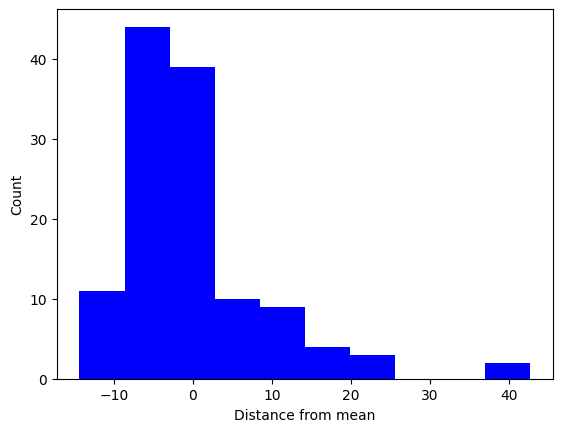

In [48]:
coffee = pd.read_csv('starbucks_customers.csv')

ages = coffee.age
min_age = np.min(ages)
max_age = np.max(ages)
print(min_age, max_age)
print(max_age-min_age)

mean_age = np.mean(ages)
print(mean_age)

centered_ages = ages - mean_age

plt.hist(centered_ages, color='b')
plt.xlabel('Distance from mean')
plt.ylabel('Count')
plt.show()

plot 1: Now, look at that! Our data is centered at 0 and we can see the spread of data, many of our customers who took the survey tend to be at the age close to 27.3

3.0245901639344264


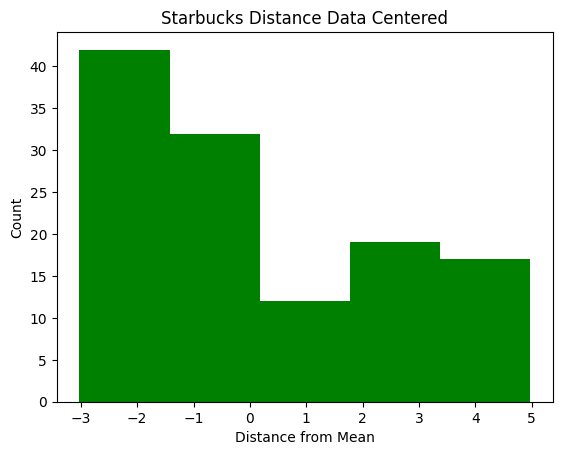

In [53]:
distance = coffee['nearest_starbucks']

mean_dis = np.mean(distance)

#take our distance array and subtract the mean_dis, this will create a new series with the results
centered_dis = distance - mean_dis

print(mean_dis)

#visualize your new list
plt.hist(centered_dis, bins = 5, color = 'g')

#label our visual
plt.title('Starbucks Distance Data Centered')
plt.xlabel('Distance from Mean')
plt.ylabel('Count')
plt.show();

Nasze dane są wyśrodkowane na 0 i widzimy rozrzut danych, wielu naszych klientów, którzy wzięli udział w ankiecie, mieszka dość blisko Starbucksa.


## Standardizing Data
known as Z-Score normalization

what we do:
* we center our data,
* then divide it by the standard deviation

what will happen?
* Once we do that, our entire data set will have a mean of zero and a standard deviation of one
* it allows all of our features to be on the same scale

when to standarize my data?
* Before Principal Component Analysis
* Before using any clustering or distance based algorithm (think KMeans or DBSCAN)
* before KNN
* Before performing regularization methods like LASSO and Ridge

$$z=\frac{value-mean}{stdev}$$


In [54]:
 #find the mean of our feature
distance_mean = np.mean(distance)

#find the standard deviation of our feature
distance_std_dev = np.std(distance)

#this will take each data point in distance subtract the mean, then divide by the standard deviation
distance_standardized = (distance - distance_mean) / distance_std_dev

print(type(distance_standardized))

print(np.mean(distance_standardized))
print(np.std(distance_standardized))

<class 'pandas.core.series.Series'>
-9.464196275493137e-17
0.9999999999999997


In [ ]:
## standardize ages
mean_age = np.mean(ages)
std_dev_age = np.std(ages)
ages_standardized = (ages-mean_age)/std_dev_age
print(mean_age)
print(std_dev_age)
print(ages_standardized)
print(np.mean(ages_standardized)) #mean
print(np.std(ages_standardized)) #standarized

27.33606557377049
9.428428111378789
0      2.615912
1      0.812854
2      0.176481
3      0.070418
4      0.070418
         ...   
117   -0.565955
118   -0.565955
119   -0.778079
120   -0.778079
121   -1.414453
Name: age, Length: 122, dtype: float64
1.7290358580227847e-16
0.9999999999999999


#### Standardizing with sklearn


```
.reshape(-1,1)
```
Ta metoda numpy mówi, aby wziąć nasze dane i zwrócić je nam jako 1 kolumnę, reprezentowaną w drugiej wartości. wartość -1 prosi numpy o ustalenie dokładnej liczby wierszy do utworzenia na podstawie danych


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ages_reshaped = np.array(ages).reshape(-1,1)
ages_scaled = scaler.fit_transform(ages_reshaped)
print(np.mean(ages_scaled))
print(np.std(ages_scaled))

1.7290358580227847e-16
0.9999999999999999


## Min-Max Normalization

$$Xnorm=\frac{X-Xmin}{Xmax-Xmin}$$

In [ ]:
## get spent feature
spent = coffee.spent
max_spent = np.max(spent)
min_spent = np.min(spent)
spent_range = max_spent - min_spent

#normalize your spent feature
spent_normalized = (spent-min_spent)/spent_range
print(spent_normalized)

0      0.464286
1      0.892857
2      0.357143
3      0.250000
4      0.357143
         ...   
117    0.178571
118    0.571429
119    0.071429
120    0.678571
121    0.107143
Name: spent, Length: 122, dtype: float64


#### Min-Max Normalization with Sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

spent_reshaped = np.array(spent).reshape(-1,1)
mmscaler = MinMaxScaler()

reshaped_scaled = mmscaler.fit_transform(spent_reshaped)

print(np.max(reshaped_scaled), np.min(reshaped_scaled))

1.0 0.0


## Binning our Data
sortowanie danych

nasze dane mają zasięg od 0 km do 8 km (distance):
* distance < 1km
* 1.1km <= distance < 3km
* 3.1km <= distance < 5km
* 5.1km <= distance

8.1, bo wykluczamy-nawias niedomkniety

In [ ]:
bins = [0, 1, 3, 5, 8.1]
coffee['binned_distance'] = pd.cut(coffee['nearest_starbucks'], bins, right = False)
print(coffee[['binned_distance', 'nearest_starbucks']].head(3))


  binned_distance  nearest_starbucks
0      [5.0, 8.1)                  8
1      [5.0, 8.1)                  8
2      [5.0, 8.1)                  8


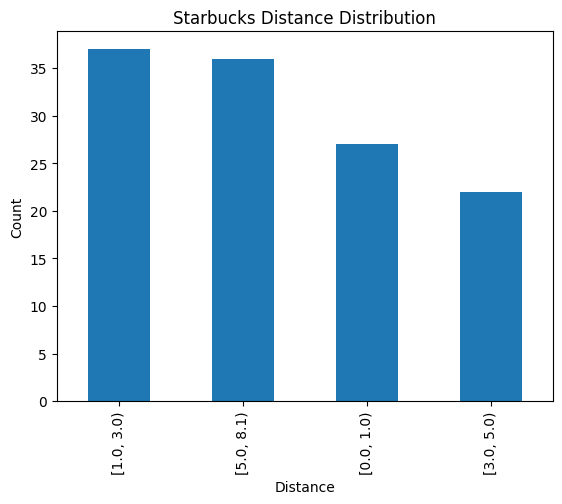

In [ ]:
coffee['binned_distance'].value_counts().plot(kind='bar')
plt.title('Starbucks Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

In [ ]:
print(np.max(ages))
print(np.min(ages))
age_bins = [13, 20, 30, 40, 71]

coffee['binned_ages'] = pd.cut(ages, age_bins, right=False)
print(coffee[['binned_ages','age']].head())

coffee['binned_ages'].value_counts().plot(kind='bar',size=20)
plt.title('Ages Distribution')
plt.xticks(rotation = 45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

NameError: ignored

## Natural Log Transformation

works well for:
* right-skewed data
* data with large outliers


results:
* allow the data to be closer to a “normal” distribution
* changes the scale so our data points will drastically reduce the range of their values
* compressing the range of our data can help our model perform better!

TO KNOW:
* if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.

You would not want to log transform your feature if:
* You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.
* You have left-skewed data. That data may call for a square or cube transformation.
* You have non-parametric data


plot 1st:

- histogram is right-skewed (prawostronnie skośny), where the majority of our data is located on the left side of our graph

plot 1st, what will happen if we put this feature to ML model?
- It will not see a lot of examples with very high prices readings, but mainly cars with odometer readings off on the left of our graph
- bad issues with our model: it may struggle to pick up on patterns that are within those examples off on the right side of our histogram


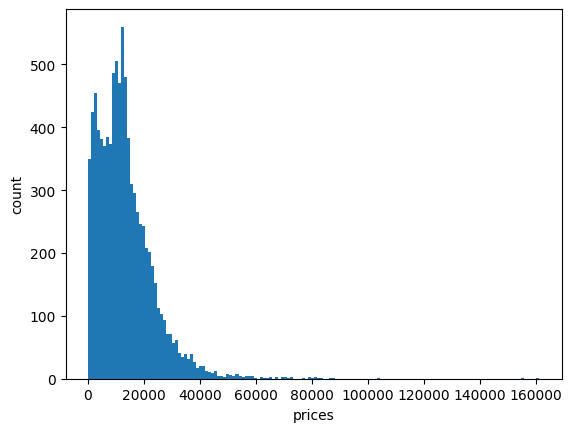

In [46]:
cars = pd.read_csv('cars.csv',encoding='cp1252')
prices = cars.sellingprice

# plot a histogram of prices
plt.hist(prices, bins = 150)
plt.xlabel('prices')
plt.ylabel('count')
plt.show()

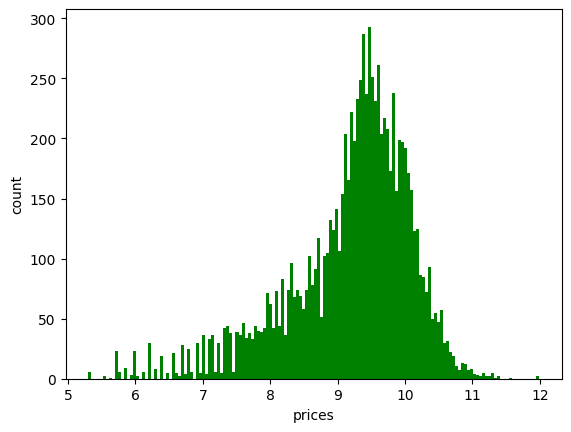

In [45]:
log_prices = np.log(prices)

plt.hist(log_prices, bins = 150, color='g')
plt.xlabel('prices')
plt.ylabel('count')
plt.show()

plot 2nd:
* Our data looks much closer to a normal distribution!

# V. Encoding Categorical Variables

Kodowanie zmiennych kategorialnych = text features.

---
dzielą się na nominalne i ordinal (te mają hierarchię)

**dtype = object** <br>
means features could be text or a mix of text and numerical values


## I. Ordinal encoding

1. należy zamienić na cyfry np. excellent - highest score, fair - lowest
2. następnie zmapować label:value

or

1. sklearn.preprocessing library OrdinalEncoder<br>
be sure to .reshape(-1,1)<br>
🛑 this method will not work if your feature has NaN values



```
# create encoder and set category order
encoder = OrdinalEncoder(categories=[['Excellent', 'New', 'Like New', 'Good', 'Fair']])

# reshape our feature
condition_reshaped = cars['condition'].values.reshape(-1,1)

# create new variable with assigned numbers
cars['condition_rating'] = encoder.fit_transform(condition_reshaped)
```



## II. Label Encoding - nominal
f.ex colors --> into nums<br>
recznie: our model could actually give ‘White’ cars 6 times more weight than a ‘Blue’ car simply because of the way we encoded this feature.
* one hot encoding

or

* sklearn.preprocessing and the LabelEncoder


```
encoder = LabelEncoder()

our_table['color'] = encoder.fit_transform(our_table['color'])
```




## III. One-hot Encoding

is when we create a dummy (fikcyjną) variable for each value of our categorical feature
* change to binary values



```
dummy_col = pd.get_dummies(our_table['color'])

# join dummy col to our table
our_table = our_table.join(dummy_col)
```



# VI. Data visualizations

Example from: https://www.scaler.com/topics/matplotlib/matplotlib-inline/

Text(0.5, 0.98, 'Categorical Plotting')

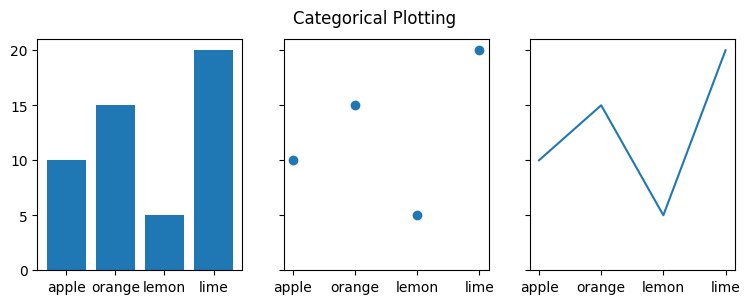

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')